In [ ]:
import os

seeds = [3, 42, 44, 46, 48, 1017]

directory = "set_mlp_cifar10_results_accuracy_seed=3/"
results = os.listdir(directory)
results

['fisherdiagonalskipset.csv',
 'fisherdiagonalset.csv',
 'neuroncentralityset.csv',
 'randomset.csv',
 'neuronemaset.csv']

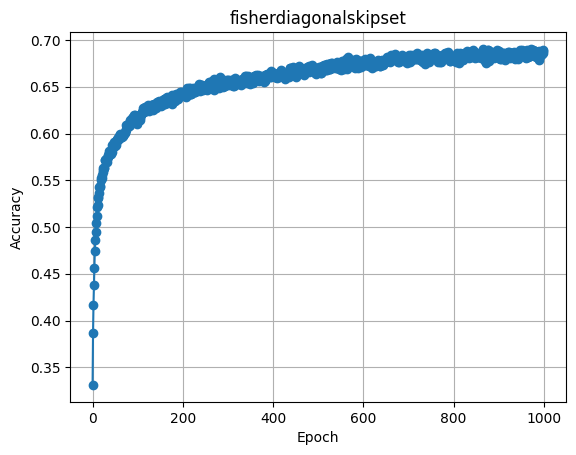

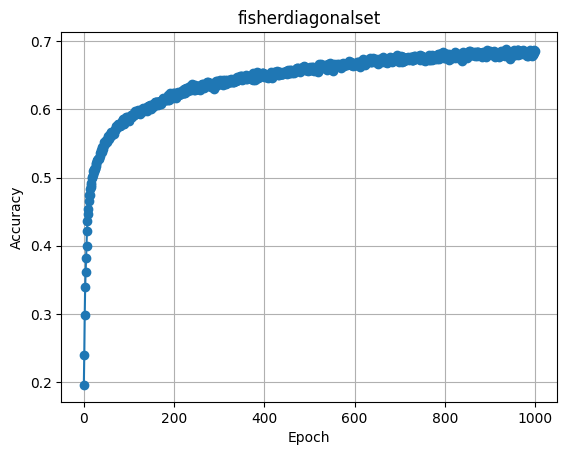

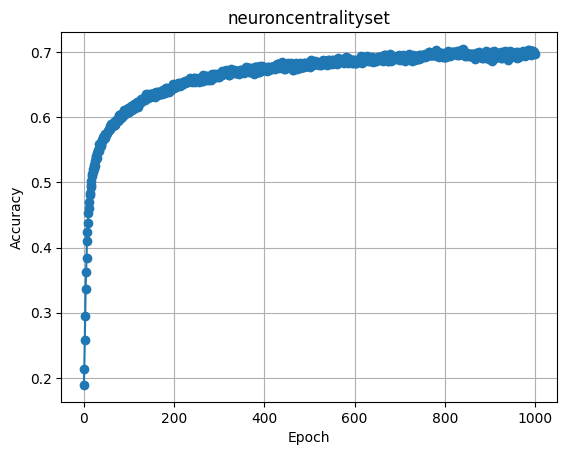

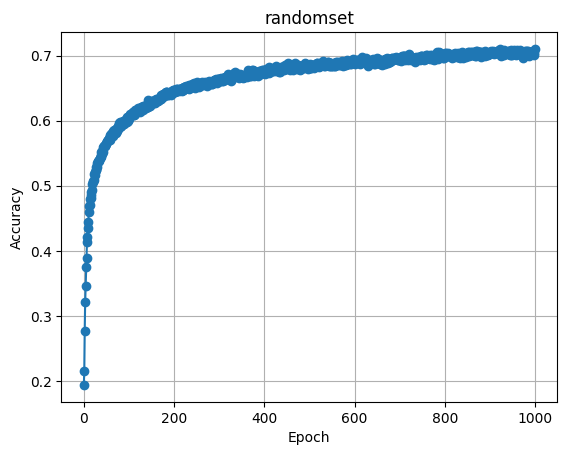

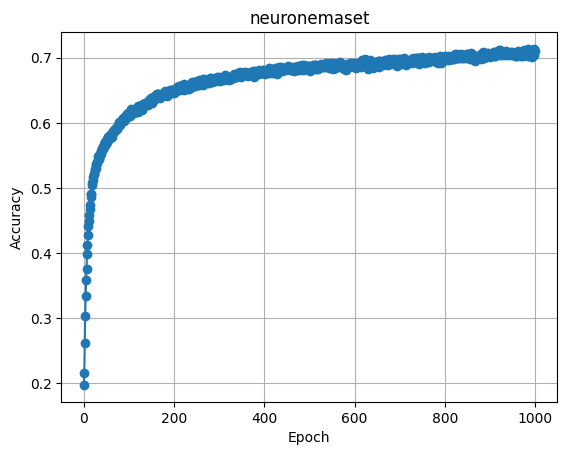

In [4]:
import csv
import matplotlib.pyplot as plt

rs = {}

for file in results:
    with open(os.path.join(directory, file), "r") as f:
        reader = csv.reader(f)
        accs = [float(row[0]) for row in reader if row]
        name = file[:-4]
        rs[name] = accs
        plt.figure()
        plt.plot(accs, marker='o')
        plt.title(name)
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.grid(True)
        plt.show()


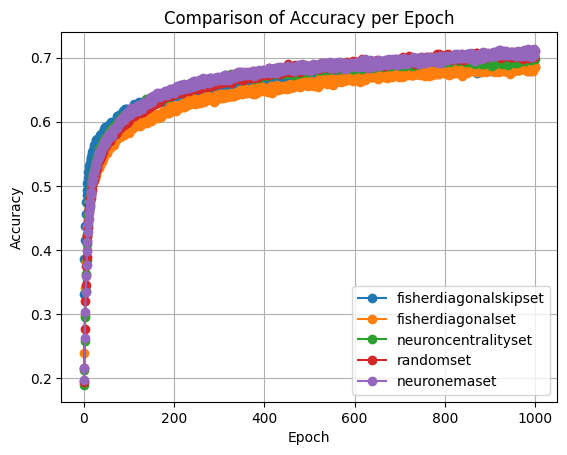

In [5]:
plt.figure()
for name, accs in rs.items():
    plt.plot(accs, marker='o', label=name)
plt.title('Comparison of Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [18]:
def find_convergence_epoch(data, threshold=0.64):
    resd = {}
    for name, accs in data.items():
        resd[name] = -1
        for i, acc in enumerate(accs):
            if acc >= threshold:
                resd[name] = i
                break
    return resd

find_convergence_epoch(rs, threshold=0.6888)

{'fisherdiagonalskipset': 842,
 'fisherdiagonalset': 936,
 'neuroncentralityset': 563,
 'randomset': 453,
 'neuronemaset': 483}

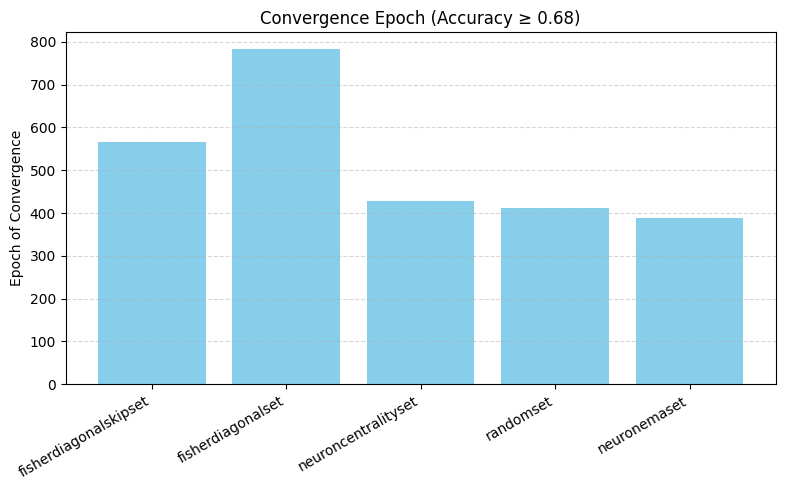

In [19]:
# Compute the convergence epochs
convergence_epochs = find_convergence_epoch(rs, threshold=0.68)

# Plot the convergence epochs
plt.figure(figsize=(8,5))
names = list(convergence_epochs.keys())
epochs = [convergence_epochs[n] if convergence_epochs[n] != -1 else float('nan') for n in names]
plt.bar(names, epochs, color='skyblue')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Epoch of Convergence')
plt.title(f"Convergence Epoch (Accuracy ≥ 0.68)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [1]:
def find_max_min_acc(data: dict[str, list[list[float]]]) -> float:
    max_acc = 0
    max_set = False
    name = ""
    for name, vals in data.items():
        for accs in vals:
            m_acc = max(accs)
            if not max_set:
                max_set = True
                max_acc = m_acc
                name = name
            else:
                if m_acc < max_acc:
                    max_acc = m_acc
                    name = name
    return max_acc, name

In [7]:
def find_convergence_epoch(data: dict[str, list[list[float]]], threshold=0.64):
    resd = {}
    for name, arr in data.items():
        resd[name] = []
        for accs in arr:
            for i, acc in enumerate(accs):
                if acc >= threshold:
                    resd[name].append(i)
                    break
                elif i == len(accs) - 1:
                    resd[name].append(-1)
    return resd

In [25]:
def find_max_accs(data: dict[str, list[list[float]]]) -> dict[str, list[float]]:
    max_accs: dict[str, list[float]] = {}
    for name, arr in data.items():
        max_accs[name] = []
        for accs in arr:
            max_accs[name].append(max(accs))
    return max_accs


In [26]:
import os
import csv
import matplotlib.pyplot as plt

seeds = [3, 42, 44, 46, 48, 1017]
rs: dict[str, list[list[float]]] = {}

for seed in seeds:
    directory = f"set_mlp_cifar10_results_accuracy_seed={seed}/"
    results = os.listdir(directory)



    for file in results:
        with open(os.path.join(directory, file), "r") as f:
            reader = csv.reader(f)
            accs = [float(row[0]) for row in reader if row]
            name = file[:-4]

            if name not in rs.keys():
                rs[name] = [accs]
            else:
                rs[name].append(accs)


target_acc, name = find_max_min_acc(rs)

print(f"Target accuracy: {target_acc}, Name: {name}")

# Compute the convergence epochs
convergence_epochs = find_convergence_epoch(rs, threshold=target_acc)
print(convergence_epochs)

max_accuracies = find_max_accs(rs)
print(max_accuracies)

# # Plot the convergence epochs
# plt.figure(figsize=(8,5))
# names = list(convergence_epochs.keys())
# epochs = [convergence_epochs[n] if convergence_epochs[n] != -1 else float('nan') for n in names]
# plt.bar(names, epochs, color='skyblue')
# plt.xticks(rotation=30, ha='right')
# plt.ylabel('Epoch of Convergence')
# plt.title(f"Convergence Epoch (Accuracy ≥ 0.68)")
# plt.grid(axis='y', linestyle='--', alpha=0.5)
# plt.tight_layout()
# plt.show()

Target accuracy: 0.6858000159263611, Name: neuronemaset
{'fisherdiagonalskipset': [719, 726, 707, 788, 725, 648], 'fisherdiagonalset': [854, 867, 836, 866, 998, 924], 'neuroncentralityset': [503, 442, 490, 471, 560, 563], 'randomset': [453, 503, 423, 523, 477, 488], 'neuronemaset': [433, 375, 446, 373, 438, 367]}
{'fisherdiagonalskipset': [0.690500020980835, 0.6930999755859375, 0.6909999847412109, 0.6906999945640564, 0.6917999982833862, 0.696399986743927], 'fisherdiagonalset': [0.6888999938964844, 0.6894000172615051, 0.6894999742507935, 0.6904000043869019, 0.6858000159263611, 0.6916000247001648], 'neuroncentralityset': [0.704800009727478, 0.7056999802589417, 0.7077999711036682, 0.7085000276565552, 0.7014999985694885, 0.7042999863624573], 'randomset': [0.7105000019073486, 0.7111999988555908, 0.7160999774932861, 0.7077000141143799, 0.7121999859809875, 0.7113000154495239], 'neuronemaset': [0.7135999798774719, 0.7168999910354614, 0.7160999774932861, 0.7160999774932861, 0.7153000235557556, 

([0, 1, 2, 3, 4],
 [Text(0, 0, 'fisherdiagonalskipset'),
  Text(1, 0, 'fisherdiagonalset'),
  Text(2, 0, 'neuroncentralityset'),
  Text(3, 0, 'randomset'),
  Text(4, 0, 'neuronemaset')])

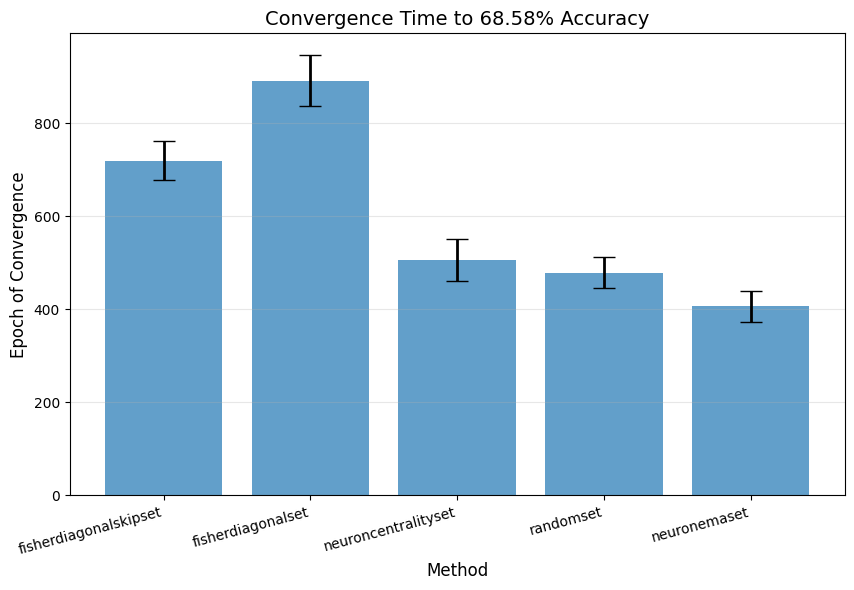

In [29]:
import numpy as np
fig, ax = plt.subplots(figsize=(10, 6))

methods = list(convergence_epochs.keys())

# Bar plot showing means
means = [np.array(convergence_epochs[method]).mean() for method in methods]
stds = [np.array(convergence_epochs[method]).std() for method in methods]
bars = ax.bar(methods, means, yerr=stds, capsize=8, alpha=0.7, 
              error_kw={'linewidth': 2})

# Overlay individual seed results as scatter points
# for i, method in enumerate(methods):
#     # Add jitter to x-position for visibility
#     x_positions = np.random.normal(i, 0.04, size=6)
#     ax.scatter(x_positions, convergence_epochs[method], 
#                color='black', alpha=0.6, s=40, zorder=3)

ax.set_ylabel('Epoch of Convergence', fontsize=12)
ax.set_xlabel('Method', fontsize=12)
ax.set_title(f'Convergence Time to {target_acc*100:.2f}% Accuracy', fontsize=14)
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=15, ha='right')

{'fisherdiagonalskipset': [69, 63, 64, 63, 61, 62], 'fisherdiagonalset': [129, 118, 126, 124, 127, 117], 'neuroncentralityset': [79, 74, 71, 76, 76, 78], 'randomset': [93, 90, 94, 92, 93, 94], 'neuronemaset': [77, 75, 80, 80, 75, 76]}


([0, 1, 2, 3, 4],
 [Text(0, 0, 'fisherdiagonalskipset'),
  Text(1, 0, 'fisherdiagonalset'),
  Text(2, 0, 'neuroncentralityset'),
  Text(3, 0, 'randomset'),
  Text(4, 0, 'neuronemaset')])

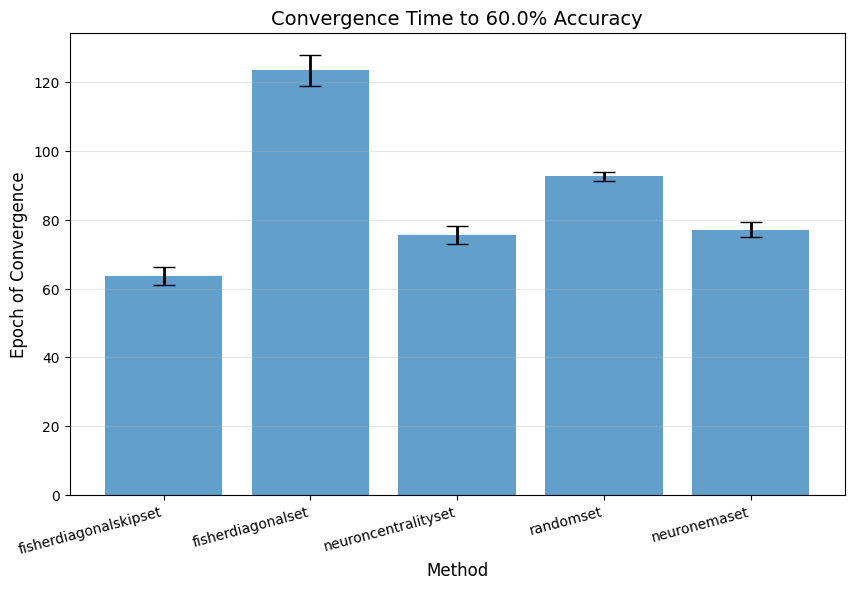

In [31]:
target_acc = 0.60
convergence_epochs = find_convergence_epoch(rs, threshold=target_acc)
print(convergence_epochs)
import numpy as np
fig, ax = plt.subplots(figsize=(10, 6))

methods = list(convergence_epochs.keys())

# Bar plot showing means
means = [np.array(convergence_epochs[method]).mean() for method in methods]
stds = [np.array(convergence_epochs[method]).std() for method in methods]
bars = ax.bar(methods, means, yerr=stds, capsize=8, alpha=0.7, 
              error_kw={'linewidth': 2})

# # Overlay individual seed results as scatter points
# for i, method in enumerate(methods):
#     # Add jitter to x-position for visibility
#     x_positions = np.random.normal(i, 0.04, size=6)
#     ax.scatter(x_positions, convergence_epochs[method], 
#                color='black', alpha=0.6, s=40, zorder=3)

ax.set_ylabel('Epoch of Convergence', fontsize=12)
ax.set_xlabel('Method', fontsize=12)
ax.set_title(f'Convergence Time to {target_acc*100}% Accuracy', fontsize=14)
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=15, ha='right')

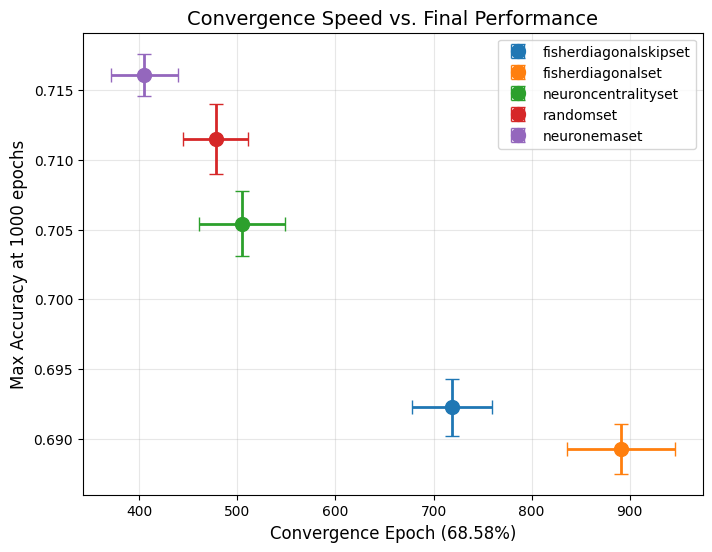

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Compute means and stds for both metrics
for method in methods:
    mean_conv = np.array(convergence_epochs[method]).mean()
    std_conv = np.array(convergence_epochs[method]).std()
    mean_acc = np.array(max_accuracies[method]).mean()
    std_acc = np.array(max_accuracies[method]).std()
    
    # Plot with error bars
    ax.errorbar(mean_conv, mean_acc, xerr=std_conv, yerr=std_acc,
                fmt='o', markersize=10, capsize=5, label=method,
                linewidth=2)

ax.set_xlabel(f'Convergence Epoch ({target_acc*100:.2f}%)', fontsize=12)
ax.set_ylabel('Max Accuracy at 1000 epochs', fontsize=12)
ax.set_title('Convergence Speed vs. Final Performance', fontsize=14)
ax.legend(loc='best')
ax.grid(alpha=0.3)
